# We will see how Multi label classification is done using Convolutional Neural Network

We will be using Fashion Data Set for this particular Exercise which is available in Keras library. It has about 70000 records, Let us use 48000 for training,12000 for validation and 10000 for test set.

**We have 10 classes in the output**.
Label Description 
 - 0 T-shirt/top 
 - 1 Trouser 
 - 2 Pullover 
 - 3 Dress 
 - 4 Coat 
 - 5 Sandal 
 - 6 Shirt 
 - 7 Sneaker 
 - 8 Bag 
 - 9 Ankle boot

# **Obtaining the data from keras**

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


**We have 60k records for training and around 10k records for the test data. Let us divide the training into 80:20 as training and validation data.**

In [0]:
from sklearn.model_selection import train_test_split
x_train_1,x_valid, y_train_1, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

**xtrain_1 refers to the training data that is the 80% of the original training data and x_valid refers to the validation data set**

Number of training examples:  48000
Size of the image:  28 X 28


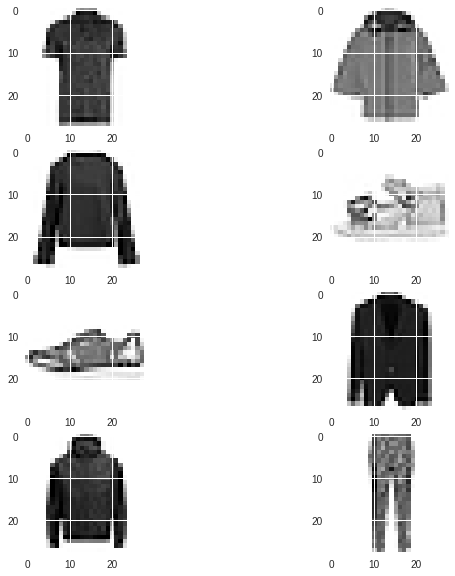

In [14]:
#Let us see how couple of images look in the training set and what the size of the image is
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(10,10))
for i in range(0,8):
  plt.subplot(4,2,i+1)
  plt.imshow(x_train_1[i])

  
print("Number of training examples: ",x_train_1.shape[0])
print("Size of the image: ",x_train_1.shape[1], "X",x_train_1.shape[2])


 **We have diferent objects like shoes, sandals, coat,jacket and tee shirt, we get to know how the image looks like from this sample and its size as 28x28**

# **Let us create a Convolutional Neural Networ as follows:**
## Input Layer(28*28 image size)
## Convolutional layer  (64 maps, 5*5)
## Maxpooling layer (2*2)
## Dropout Layer (30%)
## Convolutional layer  (32 maps, 5*5)
## Maxpooling layer (2*2)
## Dropout Layer (30%)
## Flatten Layer
## Hidden layer(128 Neurons)
## Hidden layer(64 Neurons)
## Output Layer(10 outputs)

In [15]:
# Simple CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# reshape to be [samples][channels][width][height]
x_train_1 = x_train_1.reshape(x_train_1.shape[0], 1, 28, 28).astype( 'float32' )
x_valid = x_valid.reshape(x_valid.shape[0], 1, 28, 28).astype( 'float32' )
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype( 'float32' )

# normalize inputs from 0-255 to 0-1
x_train_1 = x_train_1 / 255
x_test = x_test / 255
x_valid = x_valid  /255
# one hot encode outputs
y_train_1 = np_utils.to_categorical(y_train_1)
y_valid = np_utils.to_categorical(y_valid)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print("Number of classes in the output :", num_classes)

# create model
def baseline_model():

  model = Sequential()
  model.add(Convolution2D(64, 5, 5, input_shape=(1, 28, 28), activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Convolution2D(64, 5, 5, activation= 'relu' ))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation= 'relu' ))
  model.add(Dense(64, activation= 'relu' ))
  model.add(Dense(num_classes, activation= 'softmax'))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model

# build the model
model = baseline_model()
# Fit the model
history = model.fit(x_train_1, y_train_1, validation_data=(x_valid, y_valid), epochs=20, batch_size=400,verbose=2)


Number of classes in the output : 10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(1, 28, 28..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu")`


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 4s - loss: 0.8156 - acc: 0.6998 - val_loss: 0.5214 - val_acc: 0.8151
Epoch 2/20
 - 3s - loss: 0.4890 - acc: 0.8206 - val_loss: 0.4275 - val_acc: 0.8466
Epoch 3/20
 - 3s - loss: 0.4119 - acc: 0.8505 - val_loss: 0.3595 - val_acc: 0.8732
Epoch 4/20
 - 3s - loss: 0.3679 - acc: 0.8667 - val_loss: 0.3372 - val_acc: 0.8810
Epoch 5/20
 - 3s - loss: 0.3363 - acc: 0.8772 - val_loss: 0.3185 - val_acc: 0.8851
Epoch 6/20
 - 3s - loss: 0.3118 - acc: 0.8841 - val_loss: 0.2950 - val_acc: 0.8928
Epoch 7/20
 - 3s - loss: 0.2940 - acc: 0.8915 - val_loss: 0.2850 - val_acc: 0.8964
Epoch 8/20
 - 3s - loss: 0.2787 - acc: 0.8978 - val_loss: 0.2750 - val_acc: 0.9024
Epoch 9/20
 - 3s - loss: 0.2720 - acc: 0.8990 - val_loss: 0.2720 - val_acc: 0.9010
Epoch 10/20
 - 3s - loss: 0.2568 - acc: 0.9051 - val_loss: 0.2684 - val_acc: 0.9022
Epoch 11/20
 - 3s - loss: 0.2507 - acc: 0.9073 - val_loss: 0.2590 - val_acc: 0.9066
Epoch 12/20
 - 3s - loss: 0.2405 - 

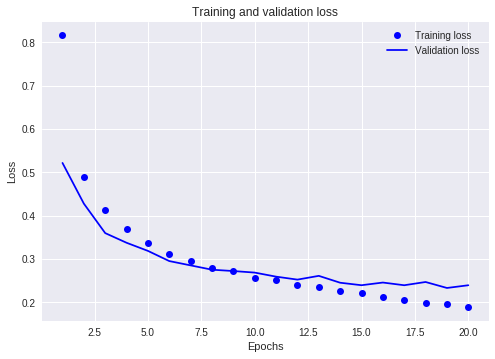

Optimum epoch:=  18


In [16]:
# Lets plot the graph of Training loss vs Validation Loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() 

epoch_optimum= np.argmin(val_loss) 

print("Optimum epoch:= ", epoch_optimum)

In [17]:

#We got to know that the validation loss is minimum at epoch=5, lets fit a new model and evaluate
model.fit(x_train_1, y_train_1, epochs=epoch_optimum, batch_size=400)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/18
48000/48000 [==============================] - 3s 68us/step - loss: 0.1865 - acc: 0.9292
Epoch 2/18
48000/48000 [==============================] - 3s 70us/step - loss: 0.1775 - acc: 0.9328
Epoch 3/18
48000/48000 [==============================] - 3s 69us/step - loss: 0.1773 - acc: 0.9327
Epoch 4/18
48000/48000 [==============================] - 3s 70us/step - loss: 0.1740 - acc: 0.9347
Epoch 5/18
48000/48000 [==============================] - 3s 70us/step - loss: 0.1692 - acc: 0.9365
Epoch 6/18
48000/48000 [==============================] - 3s 69us/step - loss: 0.1633 - acc: 0.9376
Epoch 7/18
48000/48000 [==============================] - 3s 71us/step - loss: 0.1557 - acc: 0.9415
Epoch 8/18
48000/48000 [==============================] - 3s 69us/step - loss: 0.1531 - acc: 0.9421
Epoch 9/18
48000/48000 [==============================] - 3s 70us/step - loss: 0.1475 - acc: 0.9443
Epoch 10/18
48000/48000 [==============================] - 3s 70us/step - loss: 0.1443 - acc: 0.9462

 **we are getting an error of about 8.07% , Let us try to improve this by using Data Processing techniques**

In [18]:

# mount your Drive
import keras
from google.colab import drive, files

drive.mount('/content/drive/')



filepath="/content/drive/My Drive/datasets/myweights-improvement-{epoch:02d}-{loss:.4f}.hdf5"

checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True,mode='min')



callbacks_list = [checkpoint]

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Data Augmentation**

### Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data. Given infinite data, your model would be exposed to every possible aspect of the data distribution at hand: you would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better

# **1. Feature Standardization:**standardize pixel values across the entire dataset

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)

datagen.fit(x_train_1)

augmented_data_X = []
augmented_data_y = []

num_augmented = 0
batch_size = 128
for X_batch, y_batch in datagen.flow(x_train_1, y_train_1, batch_size = batch_size, shuffle=False):
    augmented_data_X.append(X_batch)
    augmented_data_y.append(y_batch)
    num_augmented += batch_size
    if num_augmented == x_train_1.shape[0]:
        break
augmented_data_X = np.concatenate(augmented_data_X)
augmented_data_y = np.concatenate(augmented_data_y)


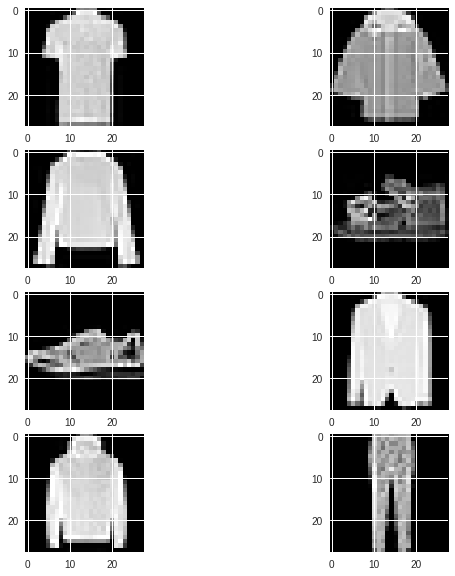

In [20]:
# reshape to be [samples][channels][width][height]
augmented_data_X = augmented_data_X.reshape(augmented_data_X.shape[0], 1, 28, 28).astype( 'float32' )

# normalize inputs from 0-255 to 0-1
augmented_data_X  = augmented_data_X  / 255

#Let us see how couple of images look in the augmented data set
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(10,10))
for i in range(0,8):
  plt.subplot(4,2,i+1)
  plt.imshow(augmented_data_X[i].reshape(28, 28), cmap=plt.get_cmap( 'gray' ))




**We see that the images and the patterns are much better than before**

In [21]:
#Let us append the augmented image with the original xtrain and we get a total of 96000 training images now in total,12000 images for validation and 10000 images for testing
X_new = np.concatenate((x_train_1,augmented_data_X))
Y_new = np.concatenate((y_train_1,augmented_data_y))


history =  model.fit(X_new, Y_new, validation_data=(x_valid, y_valid), epochs=50, batch_size=400,verbose=2)


Train on 96000 samples, validate on 12000 samples
Epoch 1/50
 - 6s - loss: 0.5964 - acc: 0.7869 - val_loss: 0.2627 - val_acc: 0.9173
Epoch 2/50
 - 6s - loss: 0.3460 - acc: 0.8699 - val_loss: 0.2840 - val_acc: 0.9185
Epoch 3/50
 - 6s - loss: 0.3113 - acc: 0.8836 - val_loss: 0.2898 - val_acc: 0.9080
Epoch 4/50
 - 6s - loss: 0.2915 - acc: 0.8906 - val_loss: 0.2853 - val_acc: 0.9166
Epoch 5/50
 - 6s - loss: 0.2788 - acc: 0.8954 - val_loss: 0.2811 - val_acc: 0.9133
Epoch 6/50
 - 6s - loss: 0.2668 - acc: 0.9005 - val_loss: 0.2841 - val_acc: 0.9172
Epoch 7/50
 - 6s - loss: 0.2565 - acc: 0.9046 - val_loss: 0.3051 - val_acc: 0.9122
Epoch 8/50
 - 6s - loss: 0.2494 - acc: 0.9071 - val_loss: 0.2945 - val_acc: 0.9180
Epoch 9/50
 - 6s - loss: 0.2441 - acc: 0.9073 - val_loss: 0.2967 - val_acc: 0.9154
Epoch 10/50
 - 6s - loss: 0.2376 - acc: 0.9113 - val_loss: 0.2924 - val_acc: 0.9142
Epoch 11/50
 - 6s - loss: 0.2333 - acc: 0.9133 - val_loss: 0.3031 - val_acc: 0.9138
Epoch 12/50
 - 6s - loss: 0.2233 - 

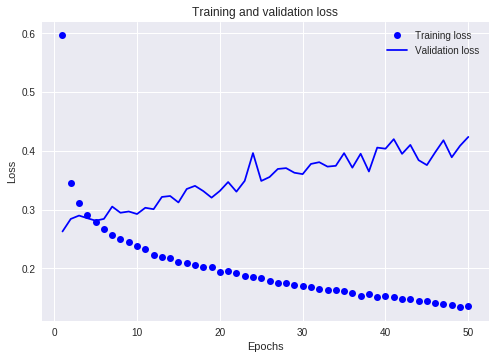

Optimum epoch:=  0


In [22]:
# Lets plot the graph of Training loss vs Validation Loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() 

epoch_optimum= np.argmin(val_loss) 

print("Optimum epoch:= ", epoch_optimum)

In [23]:

#We got to know that the validation loss is minimum at epoch=5, lets fit a new model and evaluate
model.fit(X_new, Y_new, epochs= epoch_optimum, batch_size=400)

# Final evaluation of the model
scores_2 = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores_2[1]*100))

CNN Error: 8.43%


**We see that the model is performing more or less the same way, with error close to the model without augmented images**

In [24]:

# mount your Drive
import keras
from google.colab import drive, files

drive.mount('/content/drive/')



filepath="/content/drive/My Drive/datasets_1/myweights-improvement-{epoch:02d}-{loss:.4f}.hdf5"

checkpoint_1 = keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True,mode='min')



callbacks_list = [checkpoint_1]

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **2. Random Rotation + Standardisation**

In [25]:

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range = 20)


augmented_data_X_part2 = []
augmented_data_y_part2 = []

num_augmented = 0
batch_size = 128
for X_batch, y_batch in datagen.flow(x_train_1, y_train_1, batch_size = batch_size, shuffle=False):
    augmented_data_X_part2.append(X_batch)
    augmented_data_y_part2.append(y_batch)
    num_augmented += batch_size
    if num_augmented == x_train_1.shape[0]:
        break
augmented_data_X_part2 = np.concatenate(augmented_data_X_part2)
augmented_data_y_part2 = np.concatenate(augmented_data_y_part2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


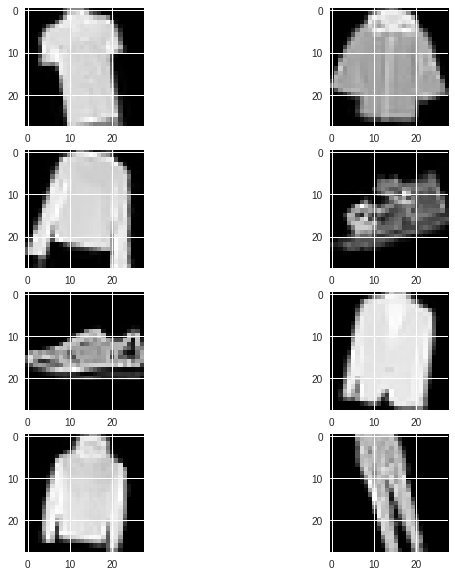

In [26]:
#LEt us see how the sample looks like

# reshape to be [samples][channels][width][height]
augmented_data_X_part2 = augmented_data_X_part2.reshape(augmented_data_X_part2.shape[0], 1, 28, 28).astype( 'float32' )

# normalize inputs from 0-255 to 0-1
augmented_data_X_part2  = augmented_data_X_part2  / 255

#Let us see how couple of images look in the augmented data set
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(10,10))
for i in range(0,8):
  plt.subplot(4,2,i+1)
  plt.imshow(augmented_data_X_part2[i].reshape(28, 28), cmap=plt.get_cmap( 'gray' ))




In [27]:


X_new_part2 = np.concatenate((x_train_1,augmented_data_X_part2))
Y_new_part2 = np.concatenate((y_train_1,augmented_data_y_part2))

history = model.fit(X_new_part2, Y_new_part2, validation_data=(x_valid, y_valid), epochs=50, batch_size=400,verbose=2)


Train on 96000 samples, validate on 12000 samples
Epoch 1/50
 - 6s - loss: 0.4229 - acc: 0.8451 - val_loss: 0.4104 - val_acc: 0.9145
Epoch 2/50
 - 6s - loss: 0.3168 - acc: 0.8821 - val_loss: 0.3909 - val_acc: 0.9143
Epoch 3/50
 - 6s - loss: 0.2951 - acc: 0.8889 - val_loss: 0.4293 - val_acc: 0.9130
Epoch 4/50
 - 6s - loss: 0.2853 - acc: 0.8929 - val_loss: 0.4280 - val_acc: 0.9132
Epoch 5/50
 - 6s - loss: 0.2713 - acc: 0.8974 - val_loss: 0.4053 - val_acc: 0.9185
Epoch 6/50
 - 6s - loss: 0.2621 - acc: 0.9023 - val_loss: 0.4196 - val_acc: 0.9148
Epoch 7/50
 - 6s - loss: 0.2560 - acc: 0.9042 - val_loss: 0.4203 - val_acc: 0.9133
Epoch 8/50
 - 6s - loss: 0.2493 - acc: 0.9068 - val_loss: 0.4052 - val_acc: 0.9194
Epoch 9/50
 - 6s - loss: 0.2421 - acc: 0.9095 - val_loss: 0.4172 - val_acc: 0.9205
Epoch 10/50
 - 6s - loss: 0.2390 - acc: 0.9103 - val_loss: 0.4225 - val_acc: 0.9172
Epoch 11/50
 - 6s - loss: 0.2381 - acc: 0.9112 - val_loss: 0.4162 - val_acc: 0.9178
Epoch 12/50
 - 6s - loss: 0.2352 - 

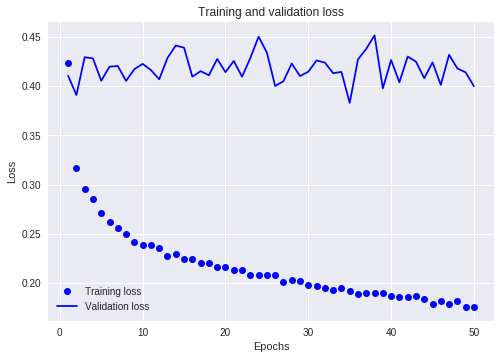

Optimum epoch:=  34


In [28]:
# Lets plot the graph of Training loss vs Validation Loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() 

epoch_optimum= np.argmin(val_loss) 

print("Optimum epoch:= ", epoch_optimum)

In [30]:
#We got to know that the validation loss is minimum at epoch=5, lets fit a new model and evaluate
model.fit(X_new_part2, Y_new_part2, epochs=epoch_optimum , batch_size=400)

# Final evaluation of the model
scores_part2 = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores_part2[1]*100))

Epoch 1/34
96000/96000 [==============================] - 7s 69us/step - loss: 0.1725 - acc: 0.9345
Epoch 2/34
96000/96000 [==============================] - 7s 69us/step - loss: 0.1696 - acc: 0.9364
Epoch 3/34
96000/96000 [==============================] - 7s 69us/step - loss: 0.1757 - acc: 0.9339
Epoch 4/34
96000/96000 [==============================] - 7s 68us/step - loss: 0.1741 - acc: 0.9352
Epoch 5/34
96000/96000 [==============================] - 7s 69us/step - loss: 0.1696 - acc: 0.9361
Epoch 6/34
96000/96000 [==============================] - 7s 69us/step - loss: 0.1679 - acc: 0.9372
Epoch 7/34
96000/96000 [==============================] - 7s 69us/step - loss: 0.1703 - acc: 0.9358
Epoch 8/34
96000/96000 [==============================] - 7s 69us/step - loss: 0.1683 - acc: 0.9368
Epoch 9/34
96000/96000 [==============================] - 7s 68us/step - loss: 0.1700 - acc: 0.9356
Epoch 10/34
96000/96000 [==============================] - 6s 67us/step - loss: 0.1687 - acc: 0.9371

In [31]:

# mount your Drive
import keras
from google.colab import drive, files

drive.mount('/content/drive/')



filepath="/content/drive/My Drive/datasets_2/myweights-improvement-{epoch:02d}-{loss:.4f}.hdf5"

checkpoint_2 = keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True,mode='min')



callbacks_list = [checkpoint_2]

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **3. Standardisation + ZCA Whitening + Random Shifts**

In [32]:

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,zca_whitening=True,width_shift_range=0.2, height_shift_range=0.1)


augmented_data_X_part3 = []
augmented_data_y_part3 = []

num_augmented = 0
batch_size = 128
for X_batch, y_batch in datagen.flow(x_train_1, y_train_1, batch_size = batch_size, shuffle=False):
    augmented_data_X_part3.append(X_batch)
    augmented_data_y_part3.append(y_batch)
    num_augmented += batch_size
    if num_augmented == x_train_1.shape[0]:
        break
augmented_data_X_part3 = np.concatenate(augmented_data_X_part3)
augmented_data_y_part3 = np.concatenate(augmented_data_y_part3)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:339: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:718: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


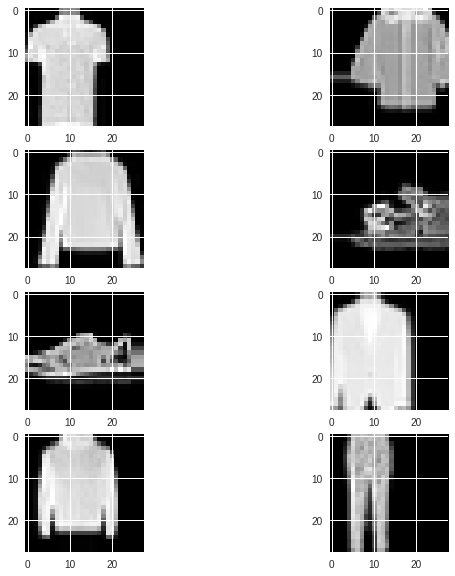

In [33]:
#LEt us see how the sample looks like

# reshape to be [samples][channels][width][height]
augmented_data_X_part3 = augmented_data_X_part3.reshape(augmented_data_X_part3.shape[0], 1, 28, 28).astype( 'float32' )

# normalize inputs from 0-255 to 0-1
augmented_data_X_part3  = augmented_data_X_part3 / 255

#Let us see how couple of images look in the augmented data set
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(10,10))
for i in range(0,8):
  plt.subplot(4,2,i+1)
  plt.imshow(augmented_data_X_part3[i].reshape(28, 28), cmap=plt.get_cmap( 'gray' ))


In [34]:

X_new_part3 = np.concatenate((x_train_1,augmented_data_X_part3))
Y_new_part3 = np.concatenate((y_train_1,augmented_data_y_part3))

history = model.fit(X_new_part3, Y_new_part3 , validation_data=(x_valid, y_valid), epochs=50, batch_size=400,verbose=2)


Train on 96000 samples, validate on 12000 samples
Epoch 1/50
 - 7s - loss: 0.3576 - acc: 0.8696 - val_loss: 0.4203 - val_acc: 0.9166
Epoch 2/50
 - 6s - loss: 0.2903 - acc: 0.8905 - val_loss: 0.4140 - val_acc: 0.9176
Epoch 3/50
 - 6s - loss: 0.2776 - acc: 0.8952 - val_loss: 0.4157 - val_acc: 0.9168
Epoch 4/50
 - 6s - loss: 0.2641 - acc: 0.8995 - val_loss: 0.4178 - val_acc: 0.9203
Epoch 5/50
 - 6s - loss: 0.2552 - acc: 0.9031 - val_loss: 0.4373 - val_acc: 0.9161
Epoch 6/50
 - 6s - loss: 0.2498 - acc: 0.9046 - val_loss: 0.3854 - val_acc: 0.9154
Epoch 7/50
 - 6s - loss: 0.2401 - acc: 0.9082 - val_loss: 0.4080 - val_acc: 0.9192
Epoch 8/50
 - 6s - loss: 0.2416 - acc: 0.9084 - val_loss: 0.3945 - val_acc: 0.9213
Epoch 9/50
 - 6s - loss: 0.2398 - acc: 0.9088 - val_loss: 0.4243 - val_acc: 0.9163
Epoch 10/50
 - 6s - loss: 0.2331 - acc: 0.9128 - val_loss: 0.4158 - val_acc: 0.9184
Epoch 11/50
 - 6s - loss: 0.2333 - acc: 0.9116 - val_loss: 0.3994 - val_acc: 0.9186
Epoch 12/50
 - 6s - loss: 0.2268 - 

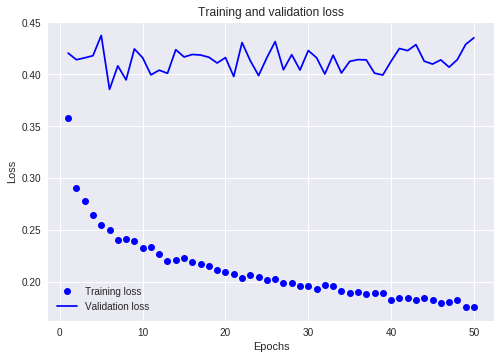

Optimum epoch:=  5


In [35]:
# Lets plot the graph of Training loss vs Validation Loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() 

epoch_optimum= np.argmin(val_loss) 

print("Optimum epoch:= ", epoch_optimum)

In [36]:
#We got to know that the validation loss is minimum at epoch=5, lets fit a new model and evaluate
model.fit(X_new_part3, Y_new_part3, epochs= epoch_optimum, batch_size=400)

# Final evaluation of the model
scores_part3 = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores_part3[1]*100))

Epoch 1/5
96000/96000 [==============================] - 7s 68us/step - loss: 0.1732 - acc: 0.9336
Epoch 2/5
96000/96000 [==============================] - 6s 67us/step - loss: 0.1772 - acc: 0.9331
Epoch 3/5
96000/96000 [==============================] - 6s 67us/step - loss: 0.1747 - acc: 0.9327
Epoch 4/5
96000/96000 [==============================] - 6s 67us/step - loss: 0.1767 - acc: 0.9327
Epoch 5/5
96000/96000 [==============================] - 6s 67us/step - loss: 0.1745 - acc: 0.9324
CNN Error: 8.53%


In [37]:

# mount your Drive
import keras
from google.colab import drive, files

drive.mount('/content/drive/')



filepath="/content/drive/My Drive/datasets_3/myweights-improvement-{epoch:02d}-{loss:.4f}.hdf5"

checkpoint_3 = keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True,mode='min')



callbacks_list = [checkpoint_3]

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **4. Standardisation + ZCA Whitening + Random Shifts + Random Rotation**

In [38]:

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,zca_whitening=True,width_shift_range=0.1, height_shift_range=0.1, rotation_range=20)


augmented_data_X_part4 = []
augmented_data_y_part4 = []

num_augmented = 0
batch_size = 128
for X_batch, y_batch in datagen.flow(x_train_1, y_train_1, batch_size = batch_size, shuffle=False):
    augmented_data_X_part4.append(X_batch)
    augmented_data_y_part4.append(y_batch)
    num_augmented += batch_size
    if num_augmented == x_train_1.shape[0]:
        break
augmented_data_X_part4 = np.concatenate(augmented_data_X_part4)
augmented_data_y_part4 = np.concatenate(augmented_data_y_part4)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:339: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:718: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


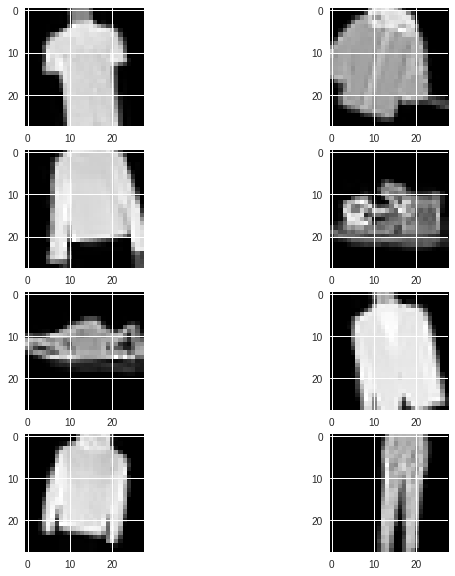

In [39]:
#LEt us see how the sample looks like

# reshape to be [samples][channels][width][height]
augmented_data_X_part4 = augmented_data_X_part4.reshape(augmented_data_X_part4.shape[0], 1, 28, 28).astype( 'float32' )

# normalize inputs from 0-255 to 0-1
augmented_data_X_part4  = augmented_data_X_part4 / 255

#Let us see how couple of images look in the augmented data set
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(10,10))
for i in range(0,8):
  plt.subplot(4,2,i+1)
  plt.imshow(augmented_data_X_part4[i].reshape(28, 28), cmap=plt.get_cmap( 'gray' ))


In [40]:

X_new_part4 = np.concatenate((x_train_1,augmented_data_X_part4))
Y_new_part4 = np.concatenate((y_train_1,augmented_data_y_part4))

history = model.fit(X_new_part4, Y_new_part4 , validation_data=(x_valid, y_valid), epochs=50, batch_size=400,verbose=2)

Train on 96000 samples, validate on 12000 samples
Epoch 1/50
 - 7s - loss: 0.2596 - acc: 0.9031 - val_loss: 0.4271 - val_acc: 0.9199
Epoch 2/50
 - 6s - loss: 0.2414 - acc: 0.9088 - val_loss: 0.3998 - val_acc: 0.9218
Epoch 3/50
 - 6s - loss: 0.2341 - acc: 0.9109 - val_loss: 0.4090 - val_acc: 0.9175
Epoch 4/50
 - 6s - loss: 0.2228 - acc: 0.9153 - val_loss: 0.4097 - val_acc: 0.9204
Epoch 5/50
 - 6s - loss: 0.2213 - acc: 0.9162 - val_loss: 0.4250 - val_acc: 0.9208
Epoch 6/50
 - 6s - loss: 0.2197 - acc: 0.9169 - val_loss: 0.4228 - val_acc: 0.9188
Epoch 7/50
 - 6s - loss: 0.2143 - acc: 0.9187 - val_loss: 0.4120 - val_acc: 0.9231
Epoch 8/50
 - 6s - loss: 0.2103 - acc: 0.9196 - val_loss: 0.4341 - val_acc: 0.9190
Epoch 9/50
 - 6s - loss: 0.2118 - acc: 0.9204 - val_loss: 0.4202 - val_acc: 0.9215
Epoch 10/50
 - 6s - loss: 0.2077 - acc: 0.9211 - val_loss: 0.4198 - val_acc: 0.9197
Epoch 11/50
 - 6s - loss: 0.2039 - acc: 0.9211 - val_loss: 0.4177 - val_acc: 0.9194
Epoch 12/50
 - 6s - loss: 0.2056 - 

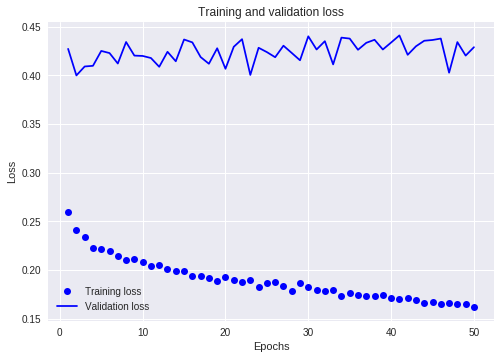

Optimum epoch:=  1


In [41]:
# Lets plot the graph of Training loss vs Validation Loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() 

epoch_optimum= np.argmin(val_loss) 

print("Optimum epoch:= ", epoch_optimum)

In [42]:
#We got to know that the validation loss is minimum at epoch=5, lets fit a new model and evaluate
model.fit(X_new_part4, Y_new_part4, epochs=epoch_optimum, batch_size=400)

# Final evaluation of the model
scores_part4 = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores_part4[1]*100))

Epoch 1/1
96000/96000 [==============================] - 7s 69us/step - loss: 0.1630 - acc: 0.9377
CNN Error: 8.75%


In [43]:

# mount your Drive
import keras
from google.colab import drive, files

drive.mount('/content/drive/')



filepath="/content/drive/My Drive/datasets_4/myweights-improvement-{epoch:02d}-{loss:.4f}.hdf5"

checkpoint_4 = keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True,mode='min')



callbacks_list = [checkpoint_4]

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Error Table**

In [51]:
import pandas as pd
model = ['normal CNN' , 'CNN+Standardisation' , 'CNN+Random Rotation + Standardisation' , 'CNN + ZCA whitening + Standardisation + Random Shifts','CNN + ZCA whitening + Standardisation + Random Shifts + Rotation']
col = ['test set error']
values = [100-scores[1]*100,100-scores_2[1]*100,100-scores_part2[1]*100,100-scores_part3[1]*100,100-scores_part4[1]*100]
pd.DataFrame(index=model, data = values, columns= col)

,test set error
normal CNN,8.07
CNN+Standardisation,8.43
CNN+Random Rotation + Standardisation,8.52
CNN + ZCA whitening + Standardisation + Random Shifts,8.53
CNN + ZCA whitening + Standardisation + Random Shifts + Rotation,8.75


**We see that the test error is the minimum for the normal CNN, usually the Data Augmentation is done to prevent overfitting. In this case since the image size is small or maybe it is not clear, the model is not able to perform any better than the model using the non augmented data. But on the large data set, we are sure that the model will perform better than the one with no augmentation**

**Thank you for the read :)**